# COURSERA GOOGLE DATA ANALYTIC CAPSTONE PROJECT 

### by yudhagiri

In [114]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data,wb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

This notebook is intended for Coursera's Google Data Analytic Certificate capstone project

The data that is being used in this project is retrieved from Kaggle.
This dataset was uploaded by Larxel (https://www.kaggle.com/andrewmvd), and intended to be used as data for predicting heart rate failure

# Data Reading

First, load the data into the notebook with pandas read csv module

In [4]:
heart_df= pd.read_csv("heart_failure_clinical_records_dataset.csv")

Next, data head is displayed to get a glimpse of what the data columns are what do they contain. Followed by checking the data information to see the data types for each column, and the statistical description

In [9]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Before moving forward with visualization and data modelling, data is being checked for any null or empty data that would make it unclean and might damage the prediction.

In [112]:
heart_df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Since there is no empty data in the dataframe, we can proceed to the next step

# Exploratory Data Analysis

Here, data is being presented in a graphical way for easier reading and defining.

The main focus of this activity is to predict fatality, so DEATH_EVENT is the column that will act as the base of finding correlation. There are 200 cases where people survive, and 99 cases of fatality in this dataset as shown in the bar chart below.

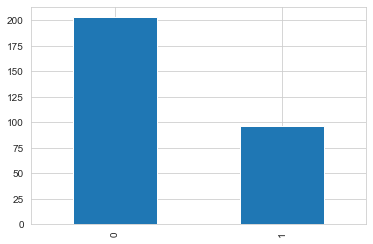

In [125]:
heart_df['DEATH_EVENT'].value_counts().plot.bar()

First I wanted to know the correlation between each column in the dataframe, thus data is being displayed with a heatmap graph

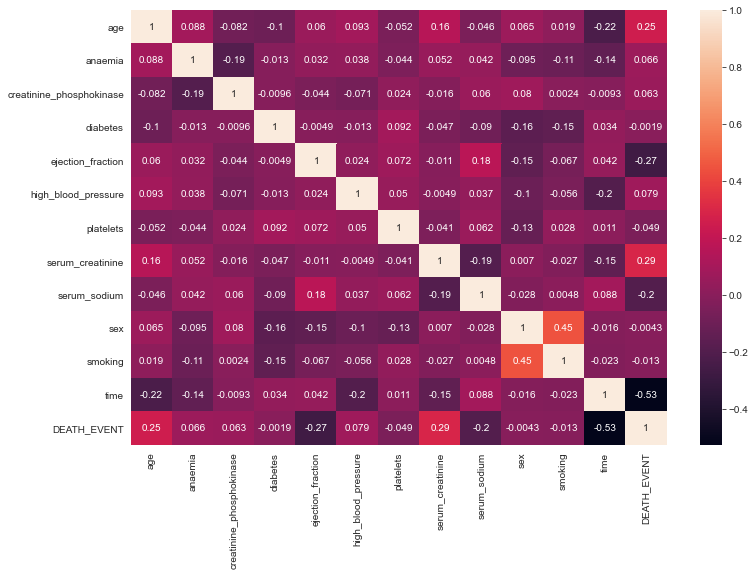

In [118]:
cor = heart_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, cmap='rocket', annot=True)

There are strong enough correlations between DEATH_EVENT and age, serum_creatinine, time, and ejection fraction. 2 of the latest have negative correlations. In the next steps, to better visualize the correlations, boxplots will be displayed for each of the 4 columns against DEATH_EVENT

## Age vs Death

As seen in the box plot below, higher fatality rate occurs on people with age group of above 55 years old, which mean that people in that age group have lower survival rate. An outlier for the survivor exist at the age 90 years old.

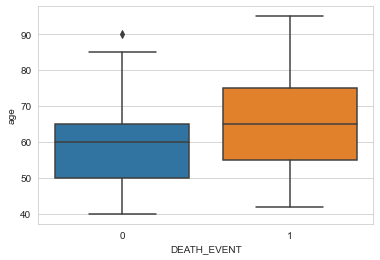

In [106]:
sns.boxplot( heart_df['DEATH_EVENT'],heart_df['age'])

## Serum Creatinine vs Death

An increased level of serum creatinine may be a sign of kidney failure, which if happened to people with heart dissease, might lower their survival rate. As seen on the box plot below, people with higher serum creatinine level indeed possess a lower survival rate than those with low serum creatinine level in their blood.

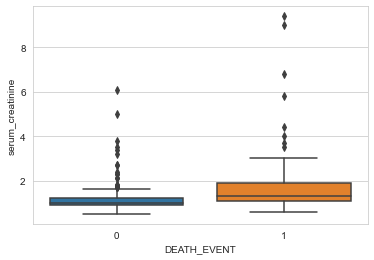

In [107]:
sns.boxplot( heart_df['DEATH_EVENT'],heart_df['serum_creatinine'])

## Follow up time vs Death

The follow up time is the amount of time someone came for a follow up following diagnosys. More follow up time can mean more consultation and treatment, while lower follow up time may mean that someone does not have enough treatment, which may lead to lower survival rate. As displayed on the box plot below, people with less follow up time tends to have lower survival rate, while people with >100 follow up time tends to survive more.

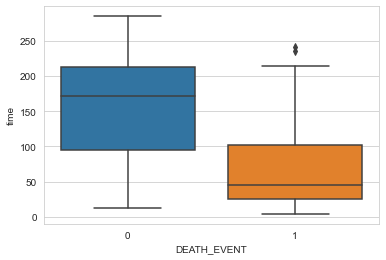

In [108]:
sns.boxplot( heart_df['DEATH_EVENT'],heart_df['time'])

## Ejection Fraction vs Death

As less blood leaves the heart, the chance of a fatal heart failure increases, thus people with lower ejection fraction tend to belong to the  lower survival rate group

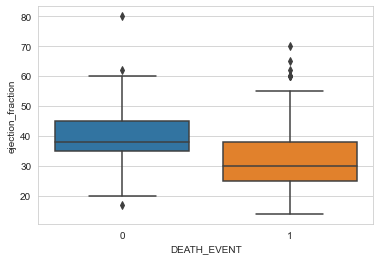

In [109]:
sns.boxplot( heart_df['DEATH_EVENT'],heart_df['ejection_fraction'])

## Correlation between each column other than death

This heatmap shows that there is not much correlation between each column other than death, therefore the analysis will continue to modelling and prediction.

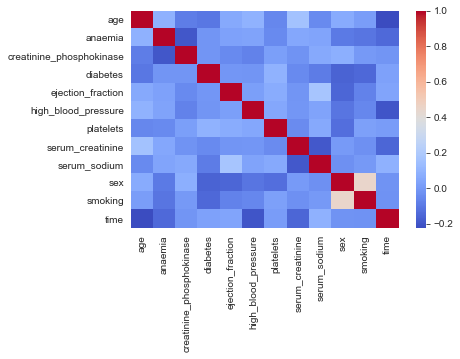

In [111]:
cor_2 = heart_df.drop(['DEATH_EVENT'],axis=1).corr()
sns.heatmap(cor_2, cmap='coolwarm', annot=False)

# Predicting Fatality

The first step was to load the train test split module that will be used for data modelling and prediction. This module splits the data into train dataset and test dataset. The train dataset will be used to train the model to make prediction, and than the predicted outcome will be compared to the test dataset to figures out its accuracy.

In [46]:
from sklearn.model_selection import train_test_split

## Logistic Regression

The data is split into X and y variable, where the X contains all the variable that can be used to predict fatality, and the y contains the predicted data, which is the fatality itself. After that, X and y are split into train and test dataset, where test dataset will contain 30% of the data.

In [50]:
X = heart_df.drop(['DEATH_EVENT'],axis=1)
y = heart_df['DEATH_EVENT']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

The data was then fitted into a logistic regression model with 1000 iteration at max, using the sklearn logistic regression module. Then, using logmodel.predict, the X test data containing the variable that can predict fatality is used to predict death, and the outcome stored in the pred_1 variable

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression(max_iter=1000)

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
pred_1 = logmodel.predict(X_test)

In order to see the comparison between the prediction and actual value (y_test), a confusion matrix and classification report were printed. 

Precision is the ratio of correct prediction for a class to the count of total predicted obeservation for that data, the precision is calculated by dividing the true positive by the sum of true positive + false positive (tp/(tp+fp))

Recall is the ratio of correctly predicted positive observations to the all observations in actual class, calculated by dividing the true positive by the sum of true positive and false negative (tp/(tp+fn))

The F-1 Score is the weighted average of Precision and Recall

The matrix of the classification report is as below:
#truepositive  falsepositive#
#falsenegative truenegative#

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
print(classification_report(y_test, pred_1))
print(confusion_matrix(y_test, pred_1))
# tp fp
# fn tn

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90

[[58  4]
 [10 18]]


The model has an accuracy of 84%, and predicted 58 correct cases of survival, and 18 corect cases of fatality.It also failed to correctly predict 14 data, 4 of the people predicted to survive died, while 10 people predicted to die survive.

Looking back at the heatmap, smoking, diabetes, and platelets have very low correlation with fatality, therefore on the next model these variables were dropped.

In [71]:
X_2 = heart_df.drop(['DEATH_EVENT' , 'smoking', 'diabetes', 'platelets'], axis=1)

In [72]:
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=101)

In [73]:
logmodel.fit(X_2_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
pred_2 = logmodel.predict(X_2_test)

In [75]:
print(classification_report(y_test, pred_2))
print(confusion_matrix(y_test, pred_2))
# tp fp
# fn tn

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.77      0.71      0.74        28

    accuracy                           0.84        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.84      0.84      0.84        90

[[56  6]
 [ 8 20]]


This new model has an accuracy of 84%, same as the previous one. Hoewever, it can predict fatality better, with 20 cases of its prediction were correct, while only 8 cases were wrong. Therefore, while the precision for the fatality case is slightly lower, the recall for positive case in this model is higher.

## Support Vector Machine

Just for fun, I wanted to compare the accuracy of logistic regression with support vector machine. SVC is loaded from sklearn svm library, and then assigned to a model named svc_model. The same dataset, without dropping smoking, diabetes, and plateles, was fitted into the svc model, and used to find a prediction that was assigned to the pred_svc variable.

In [78]:
from sklearn.svm import SVC

In [81]:
svc_model = SVC()

In [82]:
svc_model.fit(X_train,y_train)

SVC()

In [83]:
pred_svc = model.predict(X_test)

In [84]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90

[[62  0]
 [28  0]]


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The prediction has a low accuracy of only 69%, and it predicts all cases into survival class, no one is predicted to die. This model can be tuned, although unlikely, with GridSearchCV in order to fit the best parameters of C and gamma for the model

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001]}

In [134]:
grid= GridSearchCV(SVC(), param_grid, refit=True, verbose=500)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.690, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] .................... C=1, gamma=0.001, score=0.690, total=   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.5s remaining:    0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.5s remaining:    0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.707, total=   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s remaining:    0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.5s remaining:    0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47

[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    1.1s remaining:    0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    1.1s remaining:    0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.690, total=   0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    1.1s remaining:    0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.683, total=   0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.1s remaining:    0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.667, total=   0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    1.1s remaining:    0.0s
[CV] C=100, gamma=0.01 .........

[CV] ................ C=1000, gamma=0.0001, score=0.690, total=   0.0s
[Parallel(n_jobs=1)]: Done 123 out of 123 | elapsed:    1.6s remaining:    0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.762, total=   0.0s
[Parallel(n_jobs=1)]: Done 124 out of 124 | elapsed:    1.7s remaining:    0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.683, total=   0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=500)

In [135]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [136]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [137]:
grid_pred = grid.predict(X_test)

In [138]:
print(classification_report(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        62
           1       0.50      0.07      0.12        28

    accuracy                           0.69        90
   macro avg       0.60      0.52      0.47        90
weighted avg       0.64      0.69      0.60        90

[[60  2]
 [26  2]]


The SVC model still has a low accuracy, only improving the prediction for fatality slightly better. Thus I prefer to use the logistic regression model for this case

# Thank you for reading!